In [1]:
import pandas as pd

# Load dataset
file_path = 'data/raw/Coffee_Shop_Sales.csv'
df = pd.read_csv(file_path)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
 11  Revenue           149116 non-null  object 
 12  Month             149116 non-null  int64  
 13  Month.1           149116 non-null  object 
 14  Weekday           149116 non-null  int64  
 15  Weekday.1         149116 non-null  object 
 16  Hour              14

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,1,2023-01-01,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,$6.00,1,Jan,7,Sun,7
1,2,2023-01-01,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,$6.20,1,Jan,7,Sun,7
2,3,2023-01-01,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,$9.00,1,Jan,7,Sun,7
3,4,2023-01-01,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,$2.00,1,Jan,7,Sun,7
4,5,2023-01-01,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,$6.20,1,Jan,7,Sun,7


In [5]:
# Change format of tx date
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Remove $ from revenue
df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Check missing and duplicates
df = df.drop_duplicates()
df.isnull().sum()

# Check unique vals
df['store_location'].unique()
df['product_category'].unique()
df['Weekday.1'].unique()


['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
Categories (7, object): ['Sun' < 'Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat']

C:\Users\parul\AppData\Local\Temp\ipykernel_14740\923688281.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index='Weekday.1', columns='store_location', values='Revenue', aggfunc='sum')


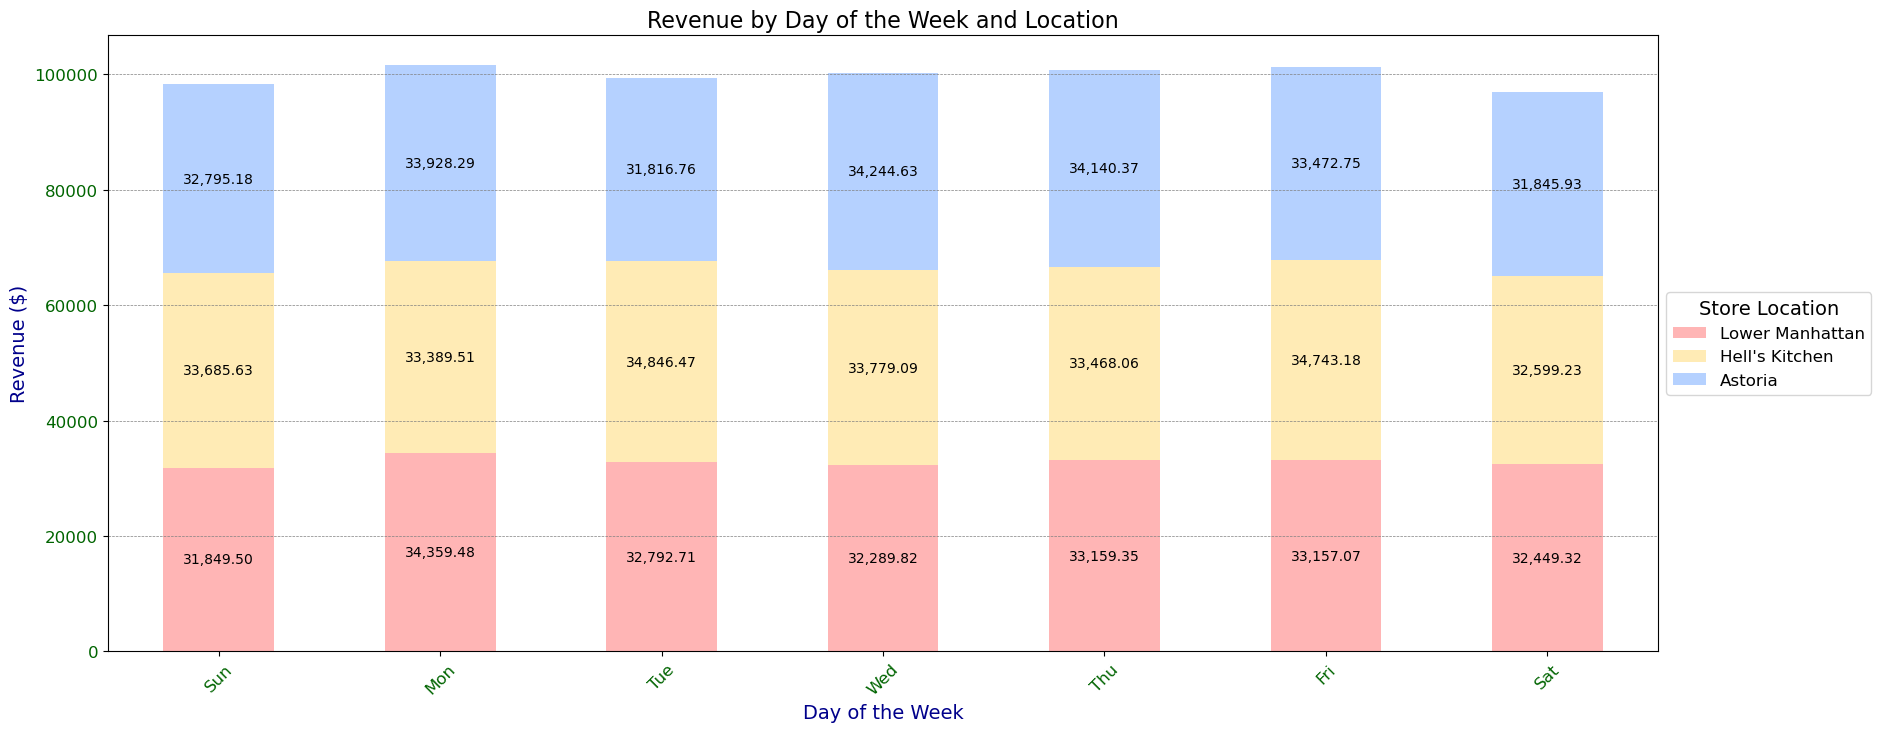

In [3]:
import matplotlib.pyplot as plt

df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(float)
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
df['Weekday.1'] = pd.Categorical(df['Weekday.1'], categories=day_order, ordered=True)

# Prep data
pivot_df = df.pivot_table(index='Weekday.1', columns='store_location', values='Revenue', aggfunc='sum')
pivot_df = pivot_df[['Lower Manhattan', "Hell's Kitchen", 'Astoria']]  

# make dataplot
fig, ax = plt.subplots(figsize=(20, 8))  
colors = ['#FFB5B5', '#FFEBB5', '#B5D1FF']  

pivot_df.plot(kind='bar', stacked=True, color=colors, ax=ax)

plt.title('Revenue by Day of the Week and Location', fontsize=16, color='black')
plt.xlabel('Day of the Week', fontsize=14, color='darkblue')
plt.ylabel('Revenue ($)', fontsize=14, color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='darkgreen')
plt.yticks(fontsize=12, color='darkgreen')

plt.grid(True, which='both', axis='y', color='gray', linestyle='--', linewidth=0.5)

for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:,.2f}' for v in container.datavalues], 
                 label_type='center', fontsize=10, color='black')  

plt.legend(title='Store Location', title_fontsize='14', fontsize='12', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


C:\Users\parul\AppData\Local\Temp\ipykernel_14740\2170042880.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index='product_category', columns='Weekday.1', values='Revenue', aggfunc='sum')


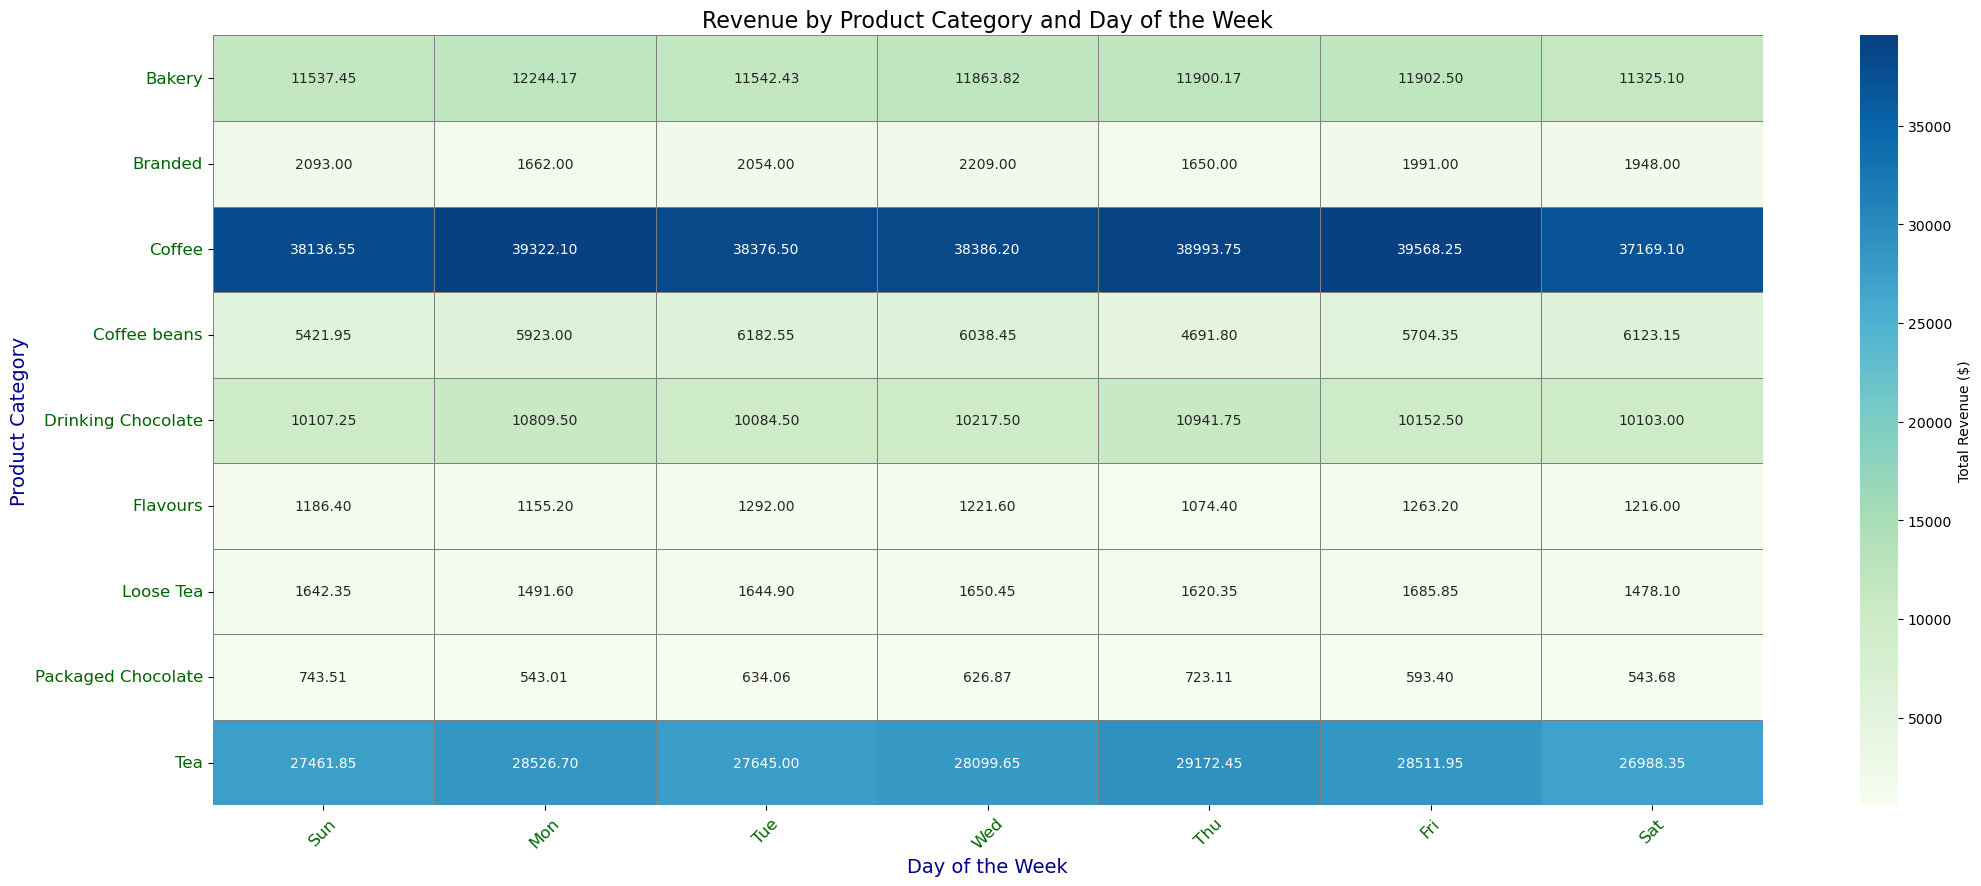

In [4]:
import seaborn as sns

# Pivot data
pivot_df = df.pivot_table(index='product_category', columns='Weekday.1', values='Revenue', aggfunc='sum')

plt.figure(figsize=(25, 10))
sns.heatmap(pivot_df, cmap='GnBu', annot=True, fmt=".2f", linewidths=.5, linecolor='gray', cbar_kws={'label': 'Total Revenue ($)'})

plt.title('Revenue by Product Category and Day of the Week', fontsize=16, color='black')
plt.xlabel('Day of the Week', fontsize=14, color='darkblue')
plt.ylabel('Product Category', fontsize=14, color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='darkgreen')
plt.yticks(fontsize=12, color='darkgreen')

plt.show()